In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv("cars_sampled.csv")
cars = cars_data.copy()

In [59]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [60]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis= 1)

cars.drop_duplicates(keep = 'first', inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


## ==== Setting up the working range ====

In [61]:
cars = cars[
    (cars["yearOfRegistration"] <= 2018)
    &(cars["yearOfRegistration"] >= 1950)
    &(cars["price"] >= 100)
    &(cars["price"] <= 80000)
    &(cars["powerPS"] >= 10)
    &(cars["powerPS"] <= 500)
]
# Approx 6700 records are dropped

To simplify the problem, we find the age of the car and storing it under a new column 'Age'

1. A = 2018 - cars["yearOfRegistration"]
2. B = cars["monthOfRegistration"] / 12

3. A + B

In [40]:
cars['Age'] = (2018 - cars['yearOfRegistration']) + ((cars['monthOfRegistration'])/12)

In [41]:
cars["Age"] = round(cars["Age"], 2)
cars['Age'].describe()

count   42754.000
mean       14.871
std         7.087
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

#### Dropping columns 'yearOfRegistration' and 'monthOfRegistration'

In [42]:
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'])

## ==== Visualizing the parameters ====

#### 1. Age

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

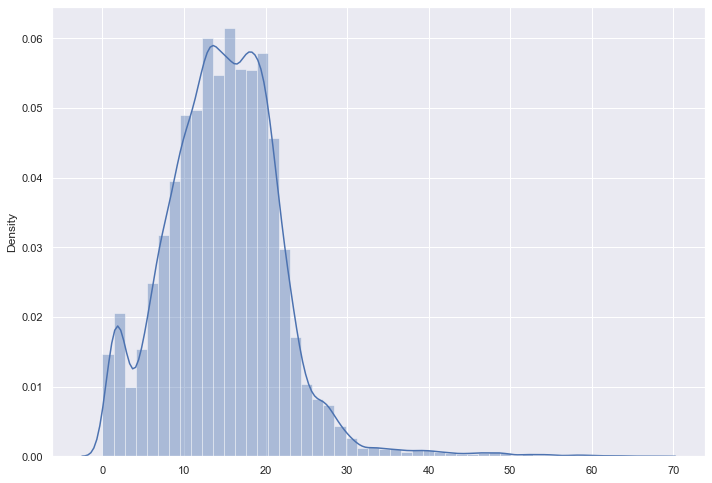

In [43]:
sns.distplot(x= cars['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

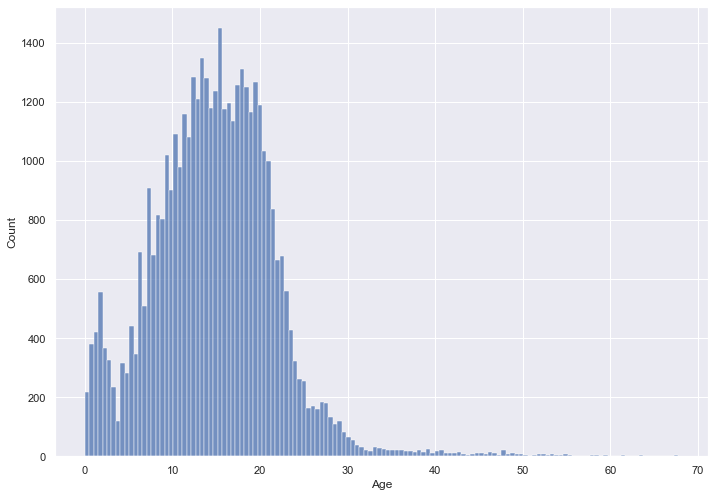

In [44]:
sns.histplot(x= cars['Age'])

<AxesSubplot:ylabel='Age'>

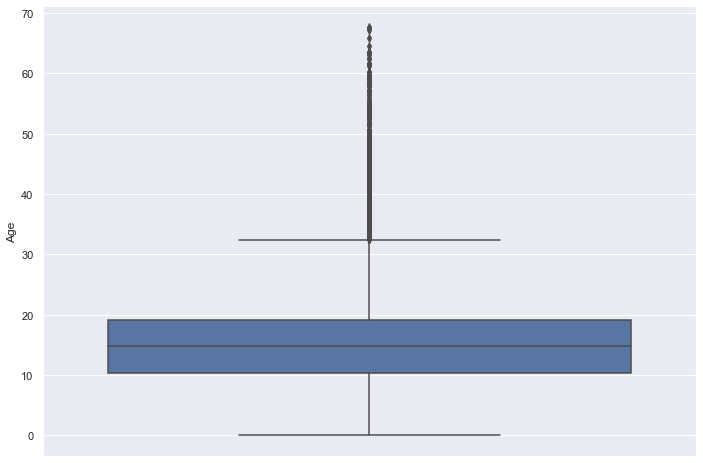

In [45]:
sns.boxplot(y = 'Age', data = cars)

In [46]:
cars['Age'].describe()

count   42754.000
mean       14.871
std         7.087
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

#### 2. Price

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

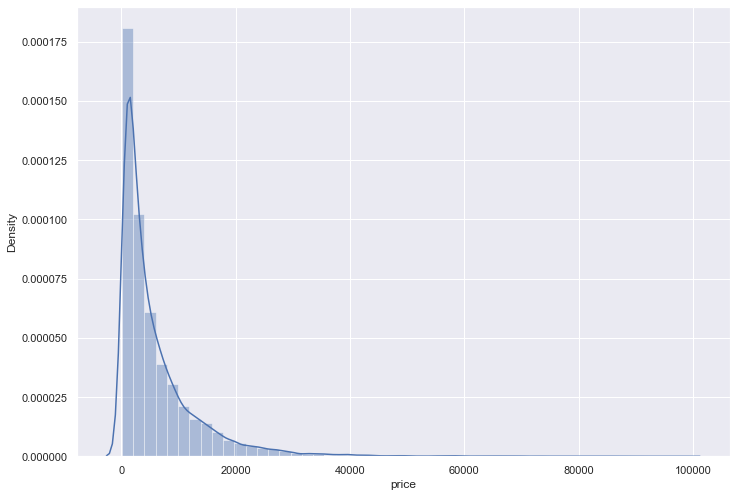

In [47]:
sns.distplot(cars['price'])

<AxesSubplot:ylabel='price'>

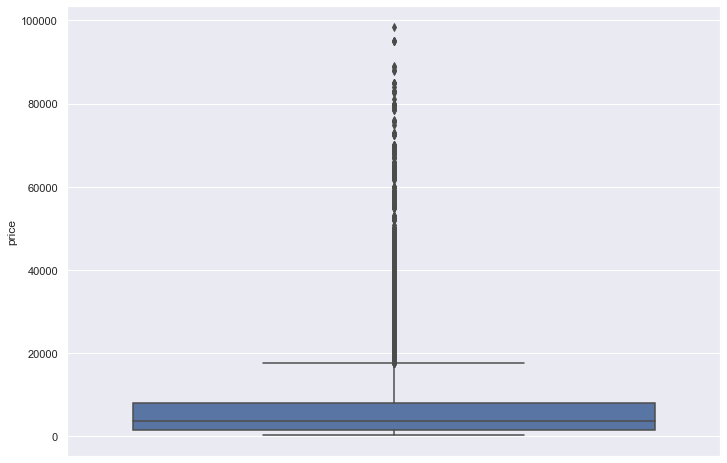

In [48]:
sns.boxplot(y = cars['price'])

In [49]:
cars['price'].describe()

count   42754.000
mean     6086.865
std      7587.557
min       100.000
25%      1450.000
50%      3499.000
75%      7900.000
max     98500.000
Name: price, dtype: float64

#### 3. powerPS

C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

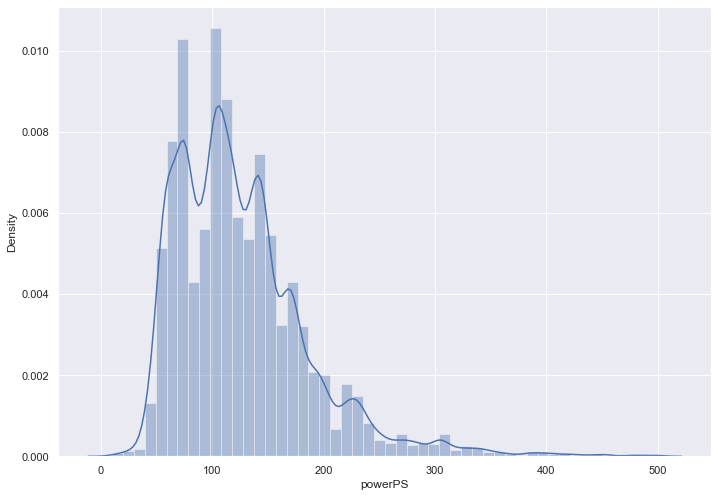

In [118]:
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

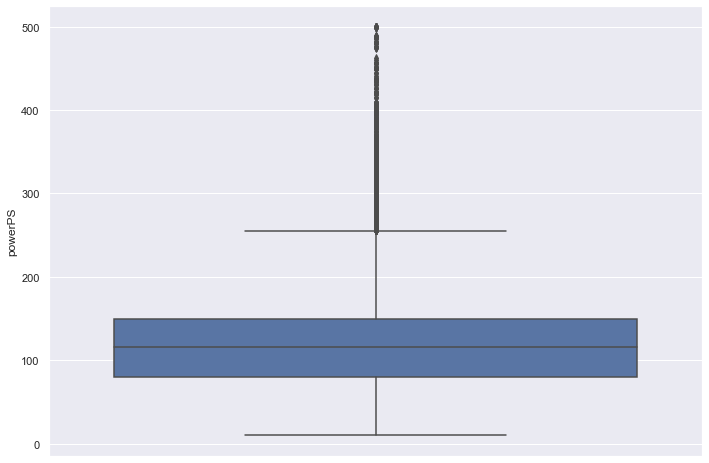

In [119]:
sns.boxplot(y = cars['powerPS'])

#### 4. Age Vs. Price

<AxesSubplot:xlabel='Age', ylabel='price'>

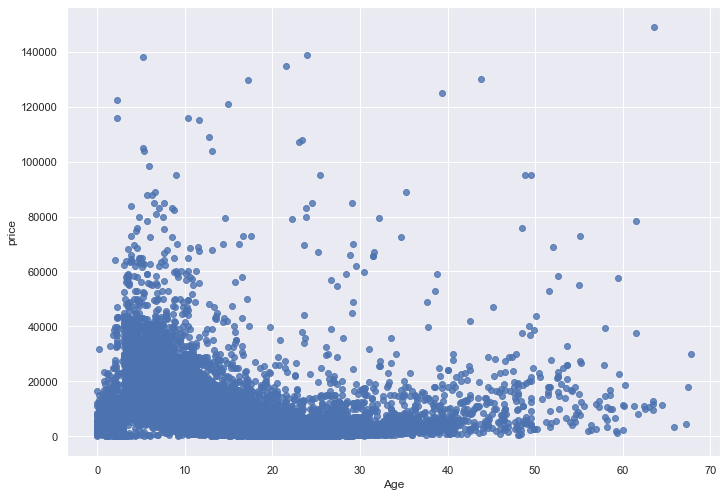

In [120]:
sns.regplot(data = cars, x = 'Age', y = 'price', fit_reg = False ,  scatter = True)

1. newer cars are priced higher
2. As the age of the car increases, its price decreased
3. however, there are some cars that are old and are still priced higher... they can be treated as vintage cars

#### 5. powerPS Vs Price

<AxesSubplot:xlabel='powerPS', ylabel='price'>

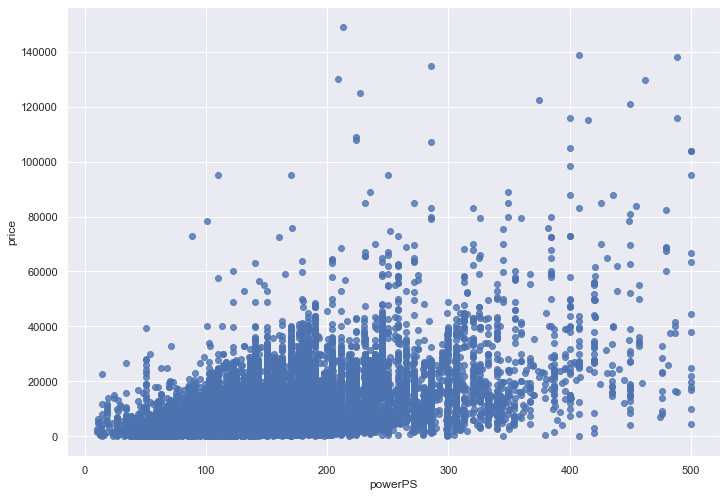

In [121]:
sns.regplot(data = cars, y = 'price', x = 'powerPS', fit_reg = False, scatter = True)

1. As powerPS increases, price also increases

## Studying the categorical variables

#### 1. variable seller

In [122]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

since only one record has seller type commercial... it is better to drop that


In [123]:
pd.crosstab(cars['seller'], columns = 'count', normalize = True)

col_0,count
seller,
commercial,0.000
private,1.000


<AxesSubplot:xlabel='seller', ylabel='count'>

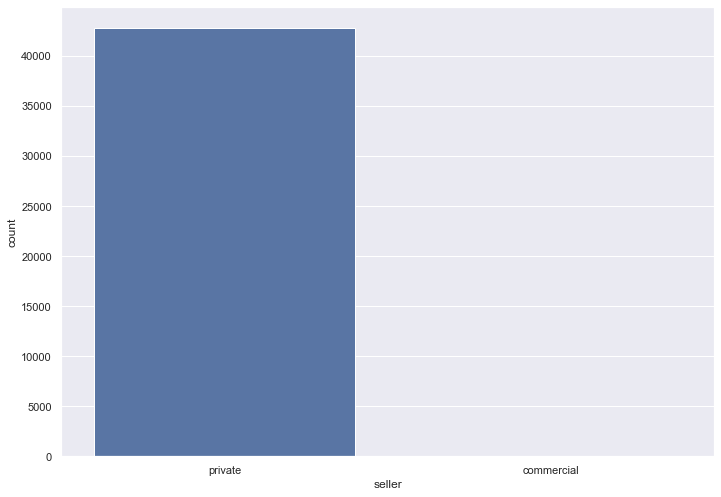

In [124]:
sns.countplot(x = cars['seller'])

#### 2. offerType

In [125]:
pd.crosstab(cars['offerType'], columns = 'count', normalize = False)

col_0,count
offerType,
offer,42772


#### 3. abtest

In [126]:
pd.crosstab(cars['abtest'], columns = 'count')

col_0,count
abtest,
control,20644
test,22128


In [127]:
pd.crosstab(cars['abtest'], columns = 'count', normalize = True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='count'>

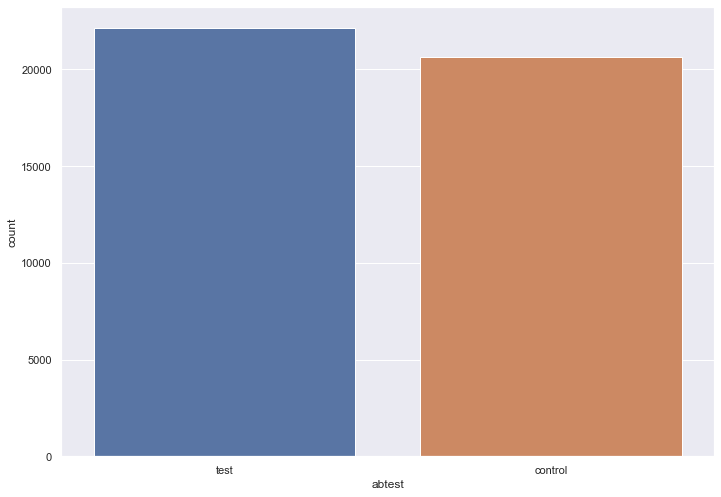

In [128]:
sns.countplot(x = 'abtest', data = cars)

#### 3.1 abtest vs price

<AxesSubplot:xlabel='abtest', ylabel='price'>

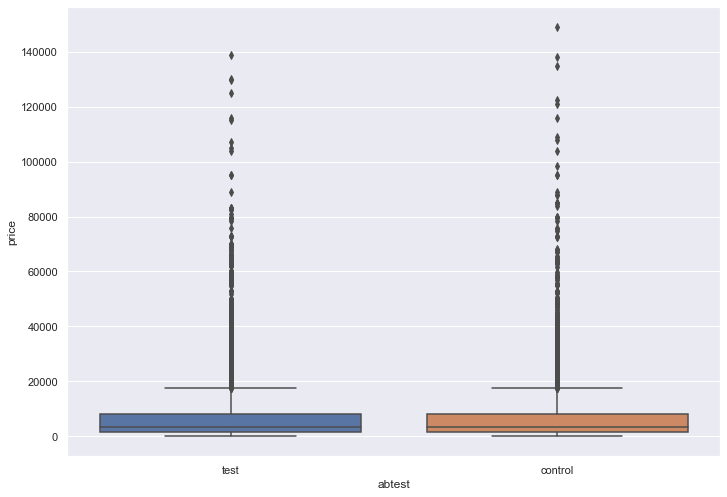

In [129]:
sns.boxplot(x ='abtest', y = 'price', data = cars)

1. for every abtest category, price is more or less the same
2. abtest does not affect the price

#### 4.vehicleType

In [130]:
pd.crosstab(cars['vehicleType'], columns = 'count', normalize = False)


col_0,count
vehicleType,
bus,3597
cabrio,2792
coupe,2261
limousine,11746
others,326
small car,9285
station wagon,8076
suv,1813


In [131]:
pd.crosstab(cars['vehicleType'], columns = 'count', normalize = True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


C:\Users\Manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

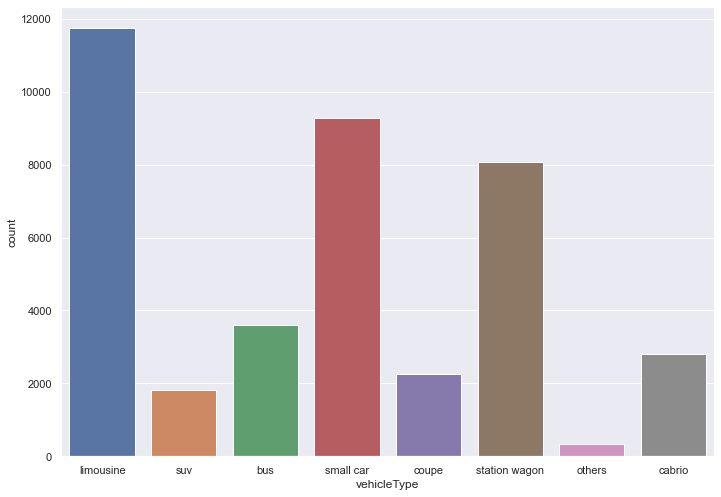

In [132]:
sns.countplot(cars['vehicleType'])

#### 4.1 vehicleType vs price

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

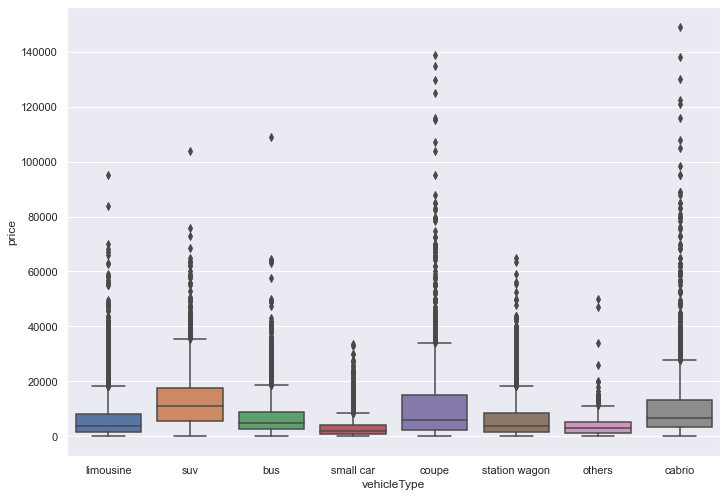

In [133]:
sns.boxplot(x = 'vehicleType', y = 'price', data = cars)

Thus, vehicleType affects price

#### 5. Gearbox

In [134]:
pd.crosstab(cars['gearbox'], columns = 'count', normalize = False)

col_0,count
gearbox,
automatic,9396
manual,32582


In [135]:
pd.crosstab(cars['gearbox'], columns = 'count', normalize = True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


#### 5.1 Gearbox vs price

<AxesSubplot:xlabel='gearbox', ylabel='price'>

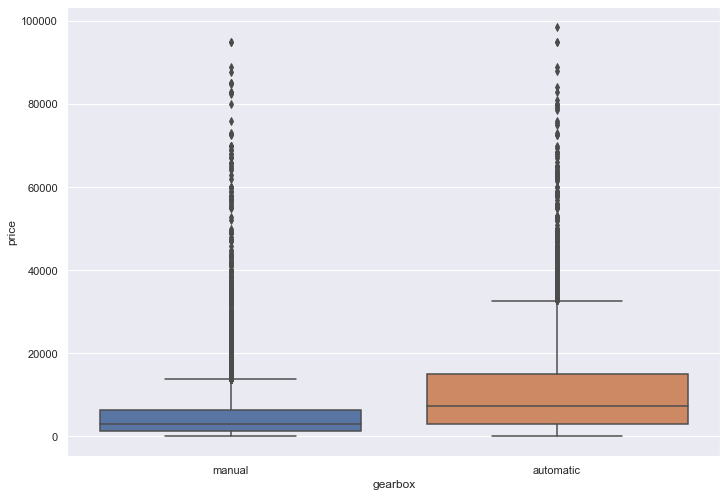

In [50]:
sns.boxplot(x = 'gearbox', y = 'price', data = cars)

Thus, variable Gearbox affects price  

#### 6. model

In [137]:
pd.crosstab(cars['model'], columns = 'count', normalize = False)

col_0,count
model,
100,47
145,4
147,58
156,65
159,19
...,...
yaris,132
yeti,27
ypsilon,22


In [138]:
pd.crosstab(cars['model'], columns = 'count', normalize = True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<AxesSubplot:xlabel='model', ylabel='count'>

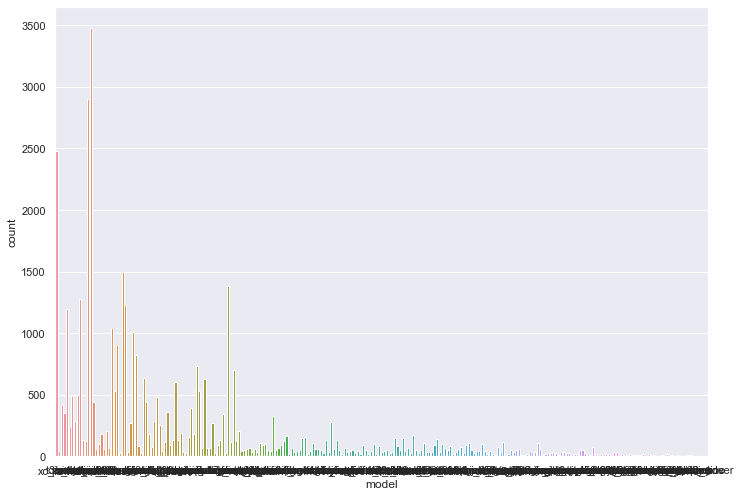

In [139]:
sns.countplot(x = cars['model'], data = cars)

#### 6.1 model vs price

<AxesSubplot:xlabel='model', ylabel='price'>

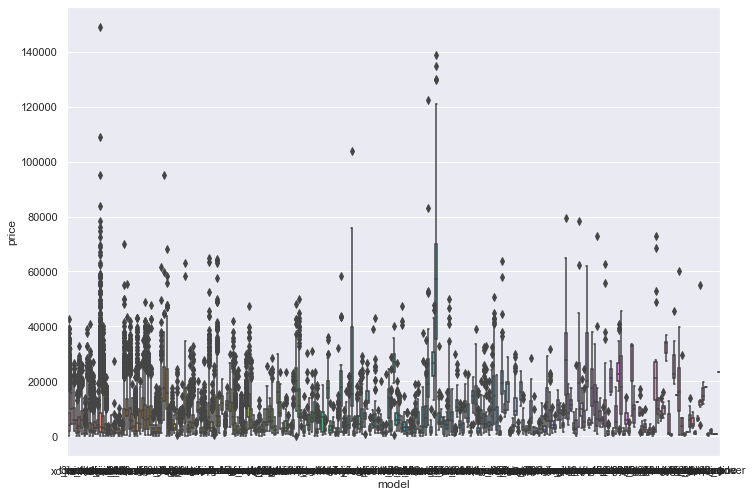

In [140]:
sns.boxplot( x = cars['model'], y = cars['price'])

#### 7.kilometer

In [141]:
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [142]:
pd.crosstab(cars['kilometer'], columns = 'count', normalize = True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


#### 7.1 kilometer vs price

<AxesSubplot:xlabel='kilometer', ylabel='price'>

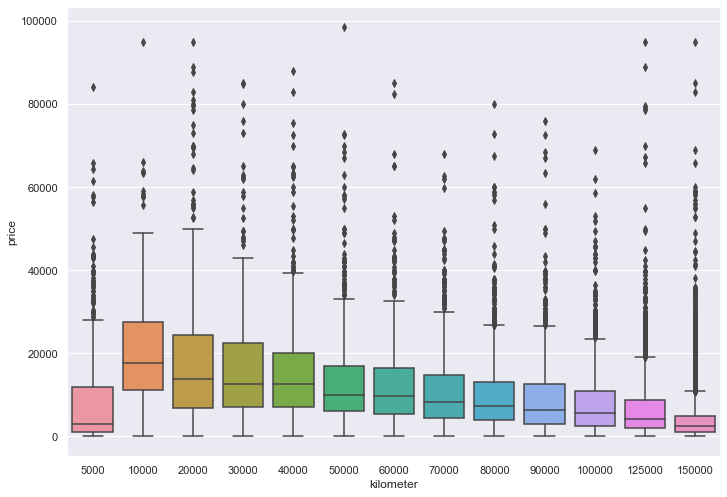

In [51]:
sns.boxplot( x = cars['kilometer'], y = cars['price'])

1. As kilometer increases, the price of the car decreases
2. Thus, kilometer variable affects price

In [144]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

<AxesSubplot:xlabel='kilometer', ylabel='Count'>

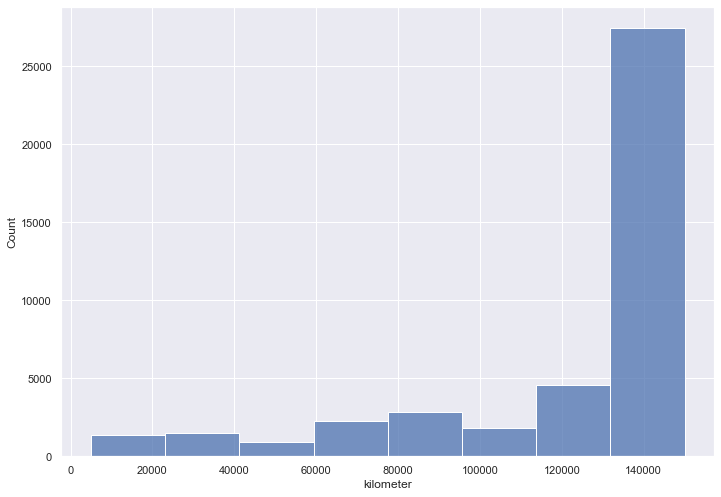

In [145]:
sns.histplot(x = cars['kilometer'], bins = 8, kde = False)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

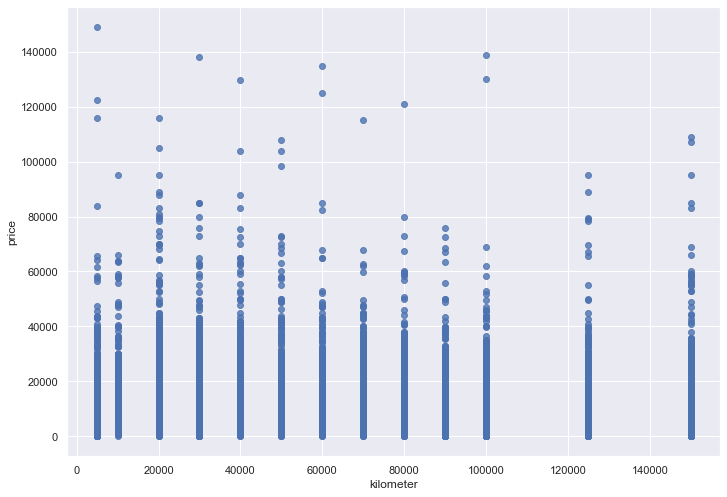

In [146]:
sns.regplot(x = cars['kilometer'],y =  cars['price'], scatter= True, fit_reg = False)

#### 8. fuelType

In [147]:
pd.crosstab(cars['fuelType'], columns = 'count', normalize = False)

col_0,count
fuelType,
cng,70
diesel,12854
electro,10
hybrid,36
lpg,690
other,6
petrol,26509


In [148]:
pd.crosstab(cars['fuelType'], columns = 'count', normalize = True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot:xlabel='fuelType', ylabel='count'>

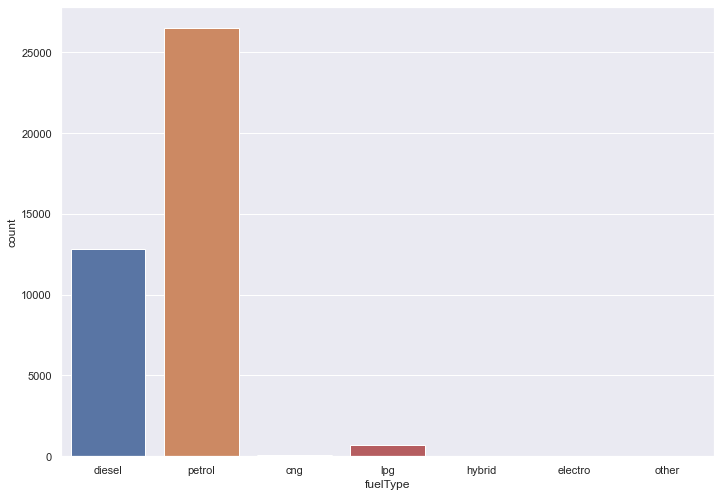

In [149]:
sns.countplot(x = cars['fuelType'])

#### 8.1 fuelType vs price

<AxesSubplot:xlabel='fuelType', ylabel='price'>

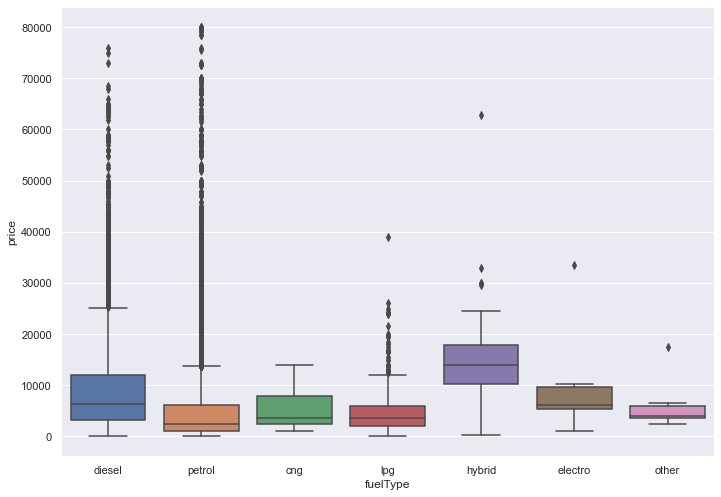

In [62]:
sns.boxplot( x = cars['fuelType'], y = cars['price'])

Thus, FuelType affects price

#### 9. brand

In [151]:
pd.crosstab(cars['brand'], columns = 'count', normalize = False)

col_0,count
brand,
alfa_romeo,245
audi,3984
bmw,4868
chevrolet,213
chrysler,151
citroen,598
dacia,123
daewoo,53
daihatsu,67


In [152]:
pd.crosstab(cars['brand'], columns = 'count', normalize = True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<AxesSubplot:xlabel='brand', ylabel='count'>

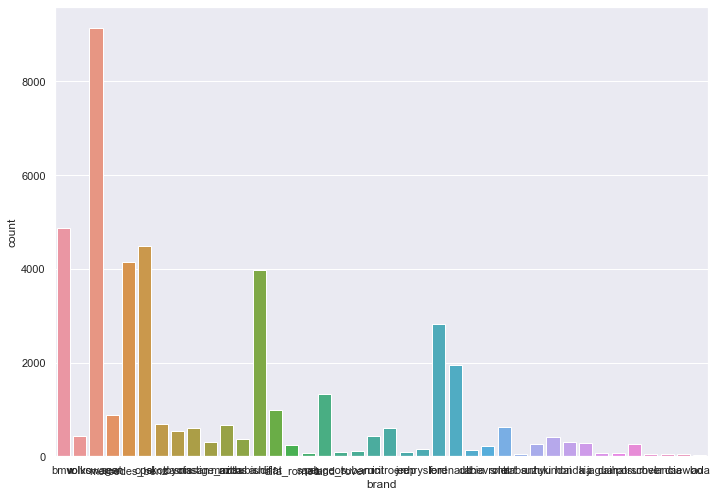

In [153]:
sns.countplot(x = cars['brand'])

#### 9.1 brand vs price

<AxesSubplot:xlabel='brand', ylabel='price'>

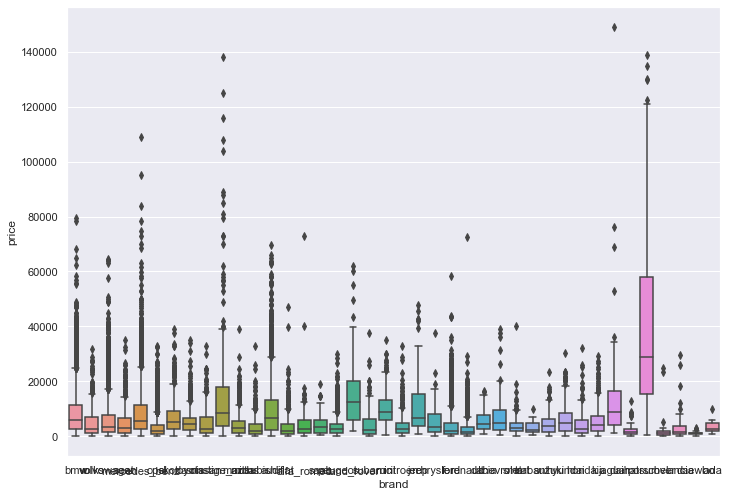

In [154]:
sns.boxplot( x = cars['brand'], y = cars['price'])

Thus, brand of the car affects the price

#### 10. notRepairedDamage
1. yes = Car is damaged and not rectified
2. no = car was damaged and repaired

In [155]:
pd.crosstab(cars['notRepairedDamage'], columns = 'count', normalize = False)

col_0,count
notRepairedDamage,
no,32507
yes,3988


In [156]:
pd.crosstab(cars['notRepairedDamage'], columns = 'count', normalize = True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

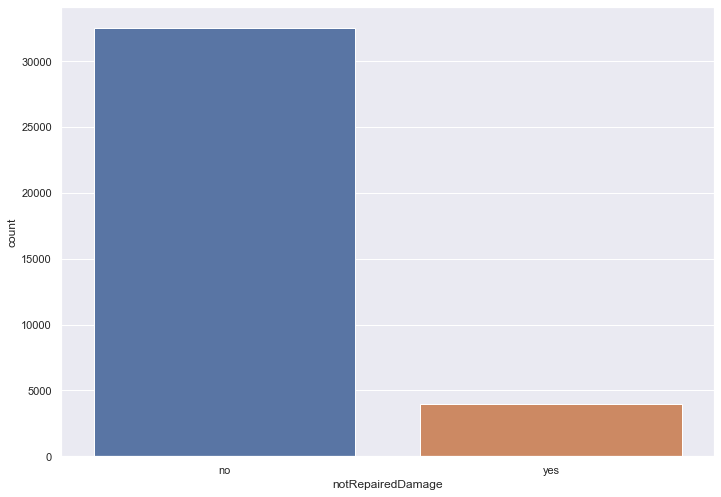

In [157]:
sns.countplot(x = cars['notRepairedDamage'])

#### 10.1notRepairedDamage vs price

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

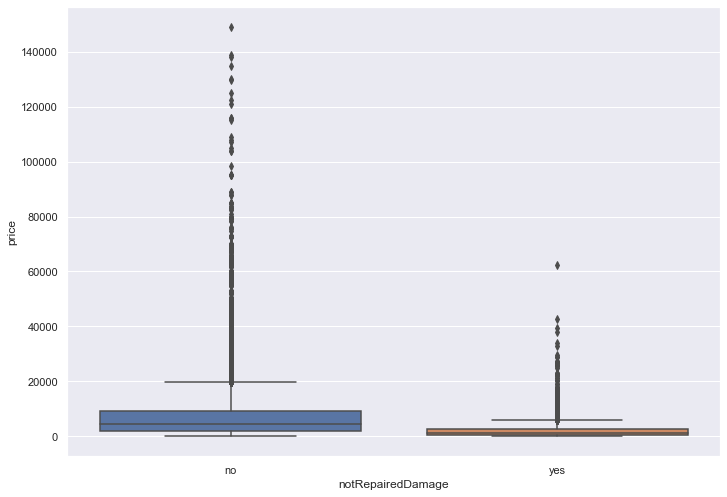

In [158]:
sns.boxplot( x = cars['notRepairedDamage'], y = cars['price'])

1. For Cars where the damage has not been rectified (under yes)... price is lower
2. Thus the price is affected by this variable

## === Removing insignificant variables ===

In [159]:
cols = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns = cols, axis = 1)

In [160]:
cars_copy = cars.copy()

## === Correlation between numerical variables ===

In [161]:
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
print(round(correlation,3))

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000


1. from here it is a little difficult to understand whaich variable has the highest influence on price
2. so, the below the code returns only the price column
3. also taking the absolute value and sorting in descending order 

In [164]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending  = False)

price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64